In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv('./data/client_data_5000.csv')

In [100]:
data.head()

,client_id,client_name,policy_type,policy_start_date,annual_premium,claims_last_3_years,communication_frequency,client_tenure_years,last_contact_date,industry,region
0,1001,"Rodriguez, Figueroa and Sanchez",Commercial Auto,2022-04-09,4811.91,0,Annually,6,2024-06-17,Construction,Durham
1,1002,Doyle Ltd,Commercial Auto,2017-05-10,10243.22,3,Quarterly,9,2024-09-02,Construction,Durham
2,1003,"Mcclain, Miller and Henderson",Property,2020-01-30,12951.29,0,Quarterly,6,2024-07-02,Technology,Durham
3,1004,Davis and Sons,General Liability,2022-12-18,7442.15,3,Annually,3,2024-07-15,Manufacturing,Durham
4,1005,"Guzman, Hoffman and Baldwin",General Liability,2018-11-13,12113.78,2,Annually,4,2025-04-11,Construction,Durham


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_id                5000 non-null   int64  
 1   client_name              5000 non-null   object 
 2   policy_type              5000 non-null   object 
 3   policy_start_date        5000 non-null   object 
 4   annual_premium           5000 non-null   float64
 5   claims_last_3_years      5000 non-null   int64  
 6   communication_frequency  5000 non-null   object 
 7   client_tenure_years      5000 non-null   int64  
 8   last_contact_date        5000 non-null   object 
 9   industry                 5000 non-null   object 
 10  region                   5000 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 429.8+ KB


In [102]:
data.describe()

,client_id,annual_premium,claims_last_3_years,client_tenure_years
count,5000.000000,5000.000000,5000.0000,5000.000000
mean,3500.500000,11457.539956,2.5052,5.436600
std,1443.520003,4880.053279,1.6971,2.917547
min,1001.000000,3003.330000,0.0000,1.000000
25%,2250.750000,7207.107500,1.0000,3.000000
50%,3500.500000,11458.950000,3.0000,5.000000
75%,4750.250000,15607.187500,4.0000,8.000000
max,6000.000000,19999.220000,5.0000,10.000000


In [103]:
data.isnull().sum()


client_id                  0
client_name                0
policy_type                0
policy_start_date          0
annual_premium             0
claims_last_3_years        0
communication_frequency    0
client_tenure_years        0
last_contact_date          0
industry                   0
region                     0
dtype: int64

In [104]:
data["policy_type"].value_counts()

policy_type
Cyber                 1018
Errors & Omissions    1016
Property               996
Commercial Auto        985
General Liability      985
Name: count, dtype: int64

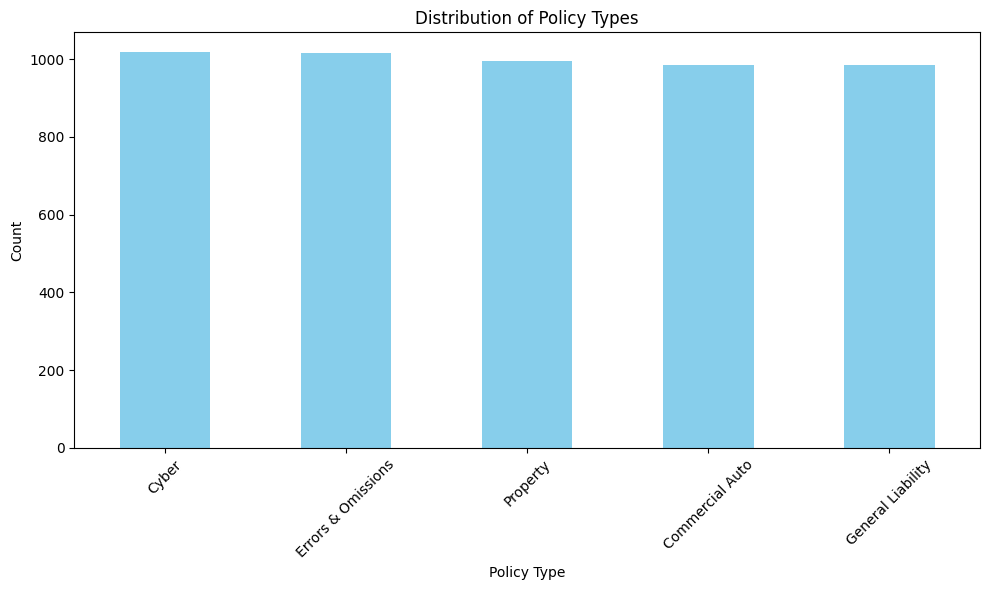

In [105]:
# 1. Distribution of policy types
plt.figure(figsize=(10, 6))
policy_counts = data['policy_type'].value_counts()
policy_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Policy Types')
plt.xlabel('Policy Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

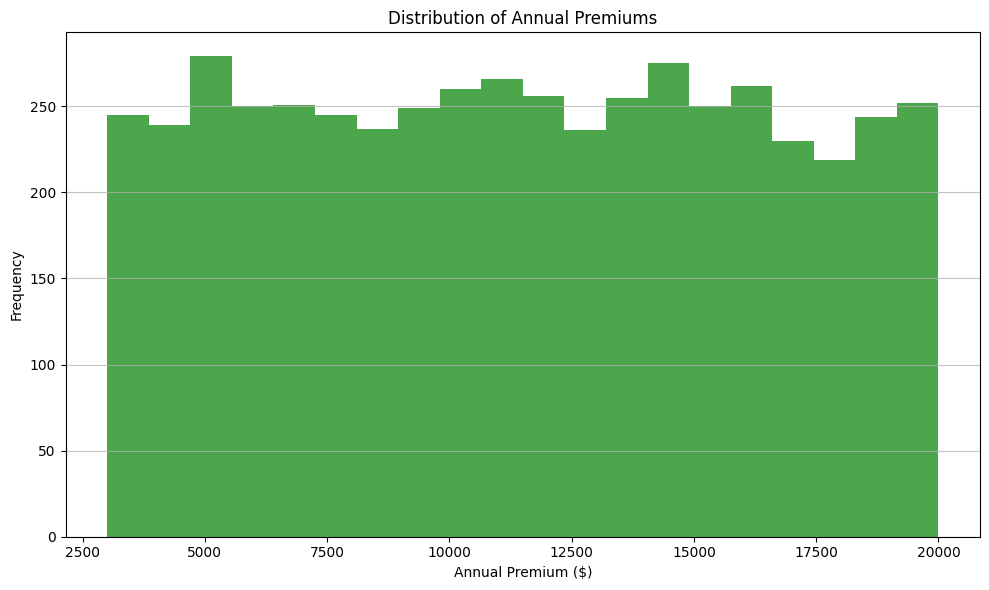

In [106]:
# 2. Annual premium distribution
plt.figure(figsize=(10, 6))
plt.hist(data['annual_premium'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Annual Premiums')
plt.xlabel('Annual Premium ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

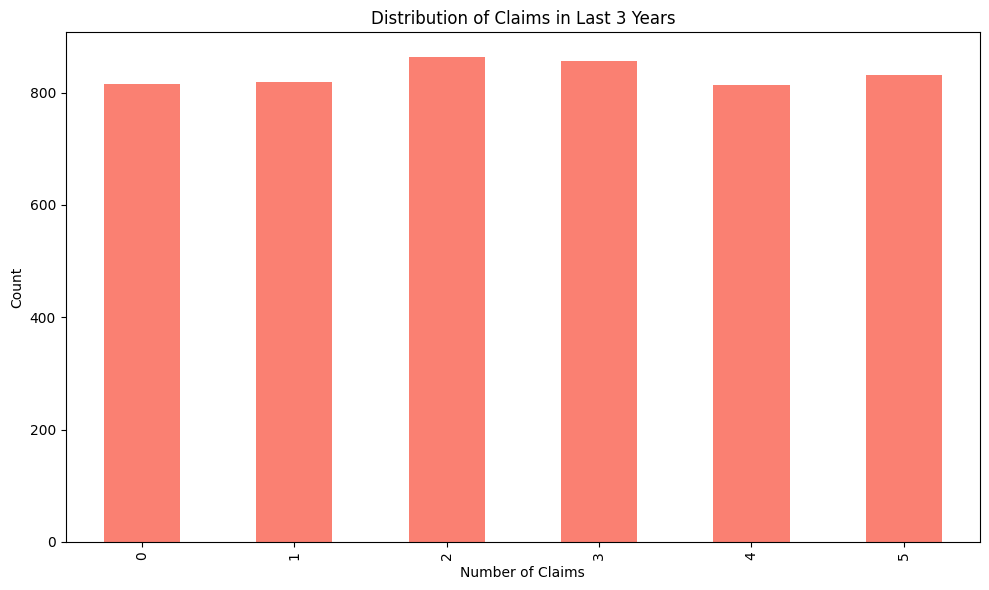

In [107]:
# 3. Claims distribution
plt.figure(figsize=(10, 6))
claims_counts = data['claims_last_3_years'].value_counts().sort_index()
claims_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Claims in Last 3 Years')
plt.xlabel('Number of Claims')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

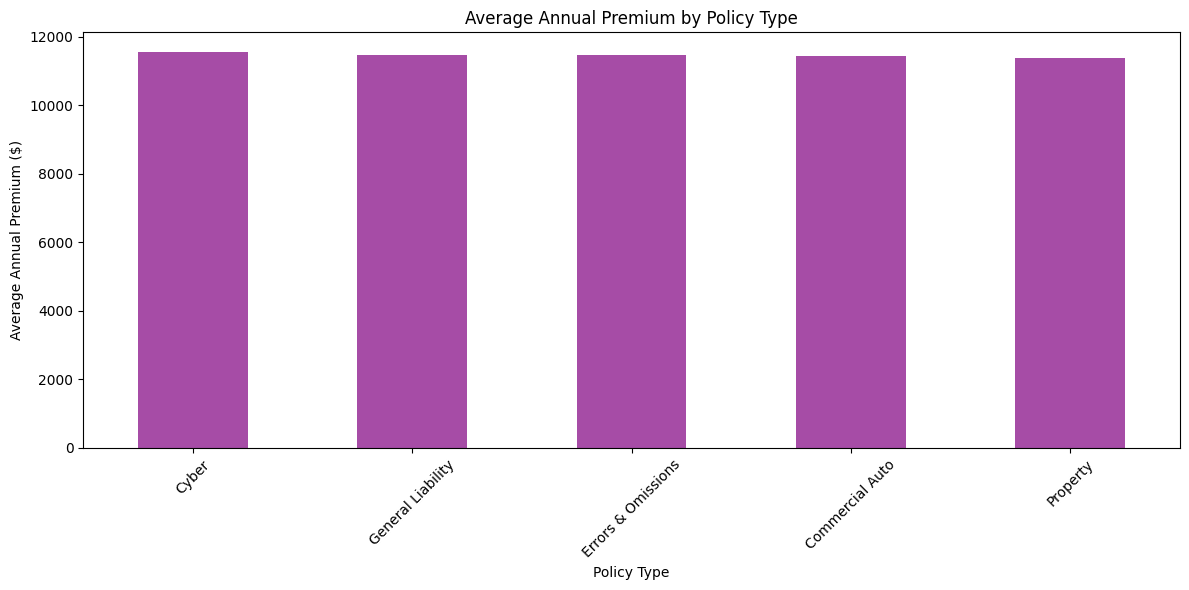

In [108]:
# 4. Average premium by policy type
plt.figure(figsize=(12, 6))
avg_premium_by_policy = data.groupby('policy_type')['annual_premium'].mean().sort_values(ascending=False)
avg_premium_by_policy.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Annual Premium by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Average Annual Premium ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

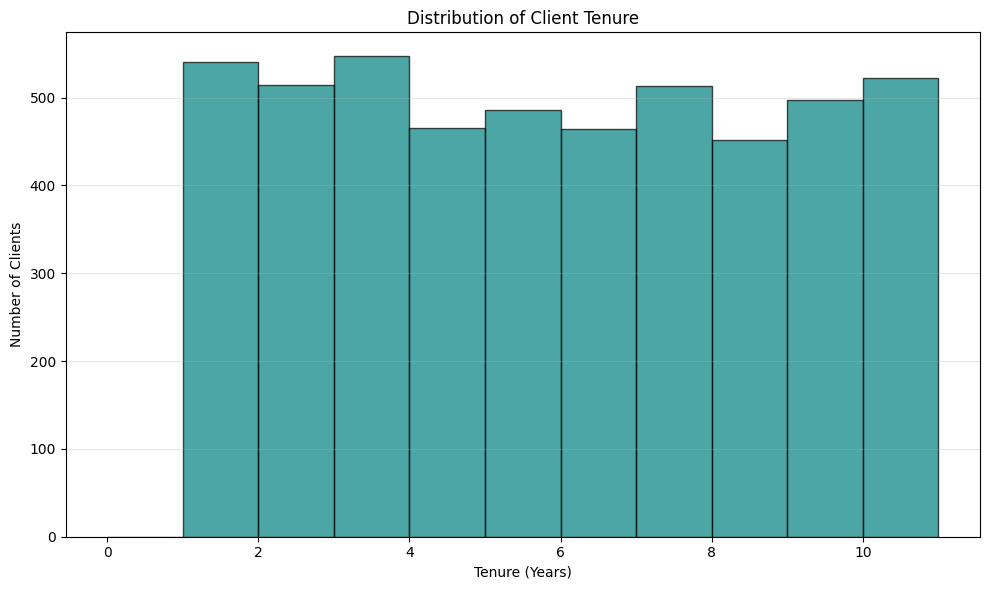

In [109]:
# 5. Client tenure distribution
plt.figure(figsize=(10, 6))
plt.hist(data['client_tenure_years'], bins=range(0, int(data['client_tenure_years'].max()) + 2), 
         color='teal', alpha=0.7, edgecolor='black')
plt.title('Distribution of Client Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Clients')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

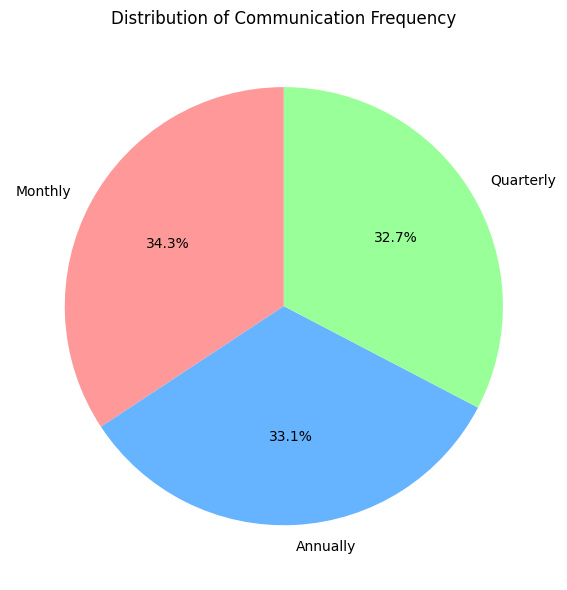

In [110]:
# 6. Communication frequency distribution
plt.figure(figsize=(10, 6))
comm_counts = data['communication_frequency'].value_counts()
comm_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                 colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Communication Frequency')
plt.ylabel('')
plt.tight_layout()
plt.show()

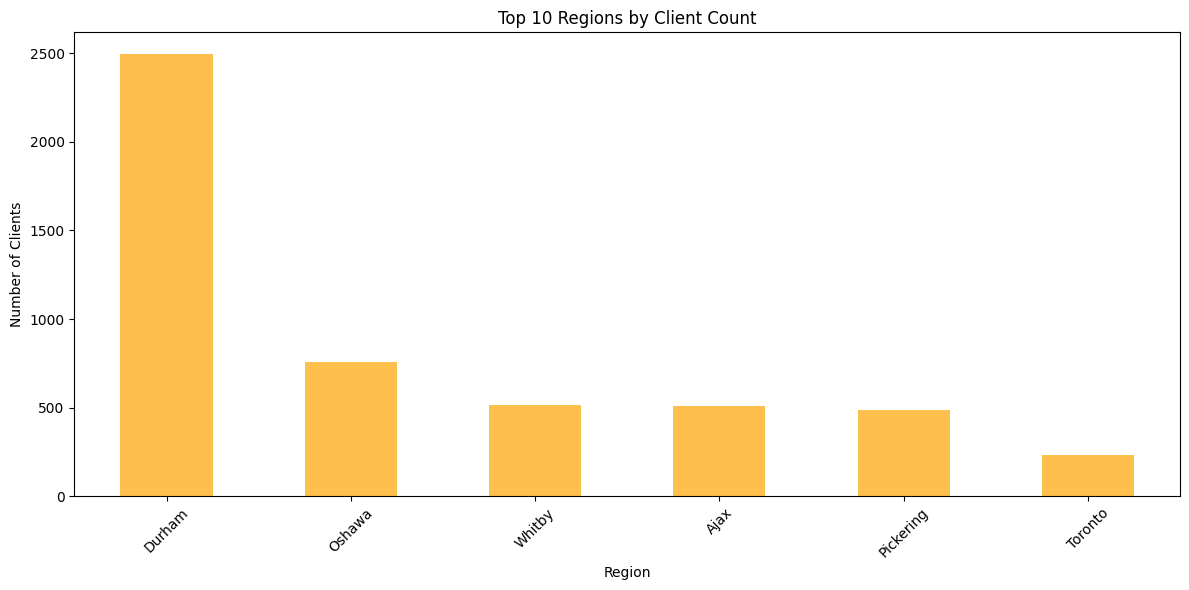

In [111]:
# 7. Region distribution
plt.figure(figsize=(12, 6))
region_counts = data['region'].value_counts().head(10)  # Top 10 regions
region_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Top 10 Regions by Client Count')
plt.xlabel('Region')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

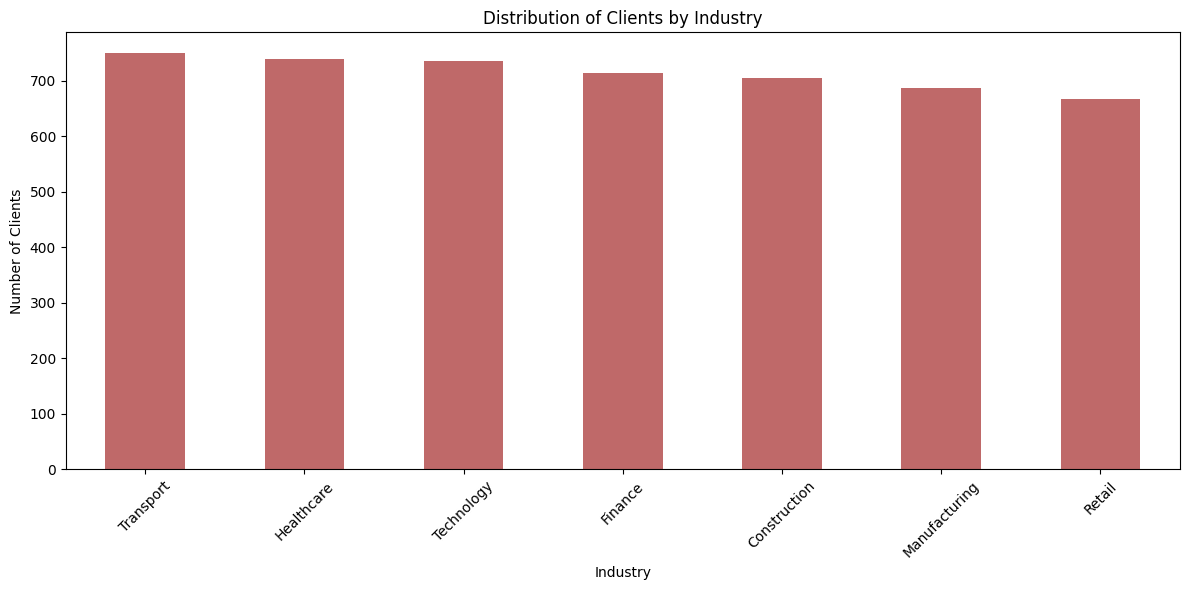

In [112]:
# 8. Industry distribution
plt.figure(figsize=(12, 6))
industry_counts = data['industry'].value_counts()
industry_counts.plot(kind='bar', color='brown', alpha=0.7)
plt.title('Distribution of Clients by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

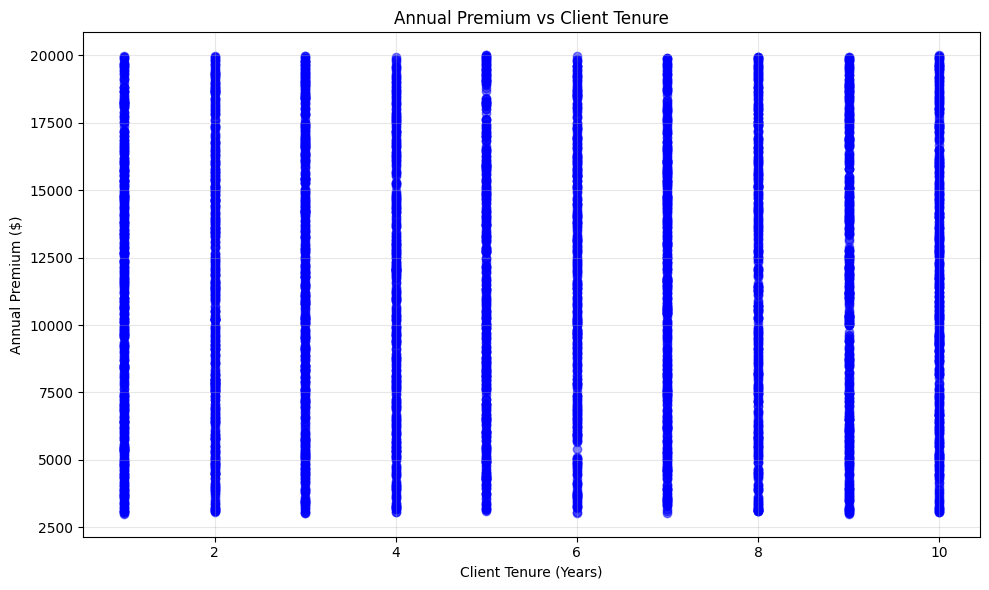

In [113]:
# 9. Scatter plot: Annual Premium vs Client Tenure
plt.figure(figsize=(10, 6))
plt.scatter(data['client_tenure_years'], data['annual_premium'], alpha=0.5, c='blue')
plt.title('Annual Premium vs Client Tenure')
plt.xlabel('Client Tenure (Years)')
plt.ylabel('Annual Premium ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

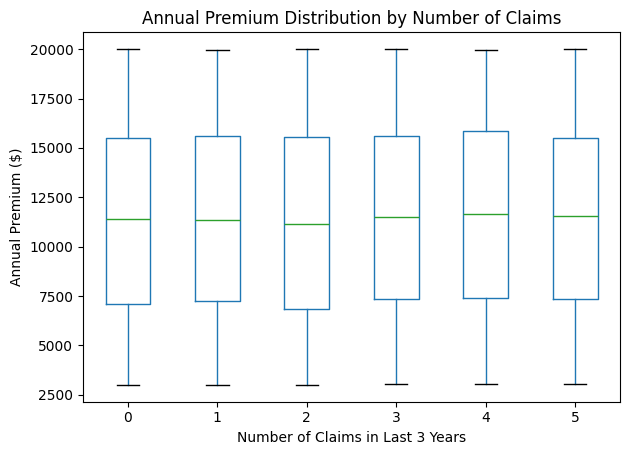

In [114]:
# 10. Box plot: Annual Premium by Number of Claims
plt.figure(figsize=(12, 6))
data.boxplot(column='annual_premium', by='claims_last_3_years', grid=False)
plt.title('Annual Premium Distribution by Number of Claims')
plt.suptitle('')  # Remove the default suptitle
plt.xlabel('Number of Claims in Last 3 Years')
plt.ylabel('Annual Premium ($)')
plt.tight_layout()
plt.show()

In [115]:
df = data

In [116]:
df.columns

Index(['client_id', 'client_name', 'policy_type', 'policy_start_date',
       'annual_premium', 'claims_last_3_years', 'communication_frequency',
       'client_tenure_years', 'last_contact_date', 'industry', 'region'],
      dtype='object')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_id                5000 non-null   int64  
 1   client_name              5000 non-null   object 
 2   policy_type              5000 non-null   object 
 3   policy_start_date        5000 non-null   object 
 4   annual_premium           5000 non-null   float64
 5   claims_last_3_years      5000 non-null   int64  
 6   communication_frequency  5000 non-null   object 
 7   client_tenure_years      5000 non-null   int64  
 8   last_contact_date        5000 non-null   object 
 9   industry                 5000 non-null   object 
 10  region                   5000 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 429.8+ KB


In [118]:
# df["client_name"].value_counts()
# df[df["client_name"] == 'Miller Ltd']

converting str to datetime


In [119]:
df["policy_start_date"] = pd.to_datetime(df["policy_start_date"])
df["last_contact_date"] = pd.to_datetime(df["last_contact_date"])

In [120]:
# Calculate days since last contact using current date
import datetime
current_date = datetime.datetime.now()
df['days_since_last_contact'] = (current_date - df['last_contact_date']).dt.days

In [121]:
# Extract year from policy_start_date and create a new column
df['policy_start_year'] = df['policy_start_date'].dt.year
# Calculate new client tenure in years based on policy start year
current_year = datetime.datetime.now().year
df['new_client_tenure_year'] = current_year - df['policy_start_year']
df["new_client_tenure_year"] = df["new_client_tenure_year"].astype('Int64')


In [122]:
drop_columns = ['client_id', 'client_name','policy_type', 'policy_start_date', 'client_tenure_years', 'last_contact_date', 'industry', 'region', 'policy_start_year']
df = df.drop(columns=drop_columns)

In [123]:
df.head()

,annual_premium,claims_last_3_years,communication_frequency,days_since_last_contact,new_client_tenure_year
0,4811.91,0,Annually,314,3
1,10243.22,3,Quarterly,237,8
2,12951.29,0,Quarterly,299,5
3,7442.15,3,Annually,286,3
4,12113.78,2,Annually,16,7


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   annual_premium           5000 non-null   float64
 1   claims_last_3_years      5000 non-null   int64  
 2   communication_frequency  5000 non-null   object 
 3   days_since_last_contact  5000 non-null   int64  
 4   new_client_tenure_year   5000 non-null   Int64  
dtypes: Int64(1), float64(1), int64(2), object(1)
memory usage: 200.3+ KB


In [125]:
df["communication_frequency"].value_counts()

communication_frequency
Monthly      1714
Annually     1653
Quarterly    1633
Name: count, dtype: int64

In [126]:
df["communication_frequency"].value_counts()


communication_frequency
Monthly      1714
Annually     1653
Quarterly    1633
Name: count, dtype: int64

In [127]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["communication_frequency"] = label_encoder.fit_transform(df["communication_frequency"])
df["communication_frequency"].value_counts()

df.head()

,annual_premium,claims_last_3_years,communication_frequency,days_since_last_contact,new_client_tenure_year
0,4811.91,0,0,314,3
1,10243.22,3,2,237,8
2,12951.29,0,2,299,5
3,7442.15,3,0,286,3
4,12113.78,2,0,16,7


In [128]:
df["communication_frequency"].value_counts()
#0 - Annually
#1 - Monthly
#2 - Quarterly

communication_frequency
1    1714
0    1653
2    1633
Name: count, dtype: int64

## No multicolinearity exist!!

In [129]:
# # Calculate correlation matrix
# correlation_matrix = df.corr()

# # Create a heatmap for better visualization
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix of Features')
# plt.tight_layout()
# plt.show()

# # Find the most correlated features
# print("\nMost correlated feature pairs:")
# # Unstack the correlation matrix and sort it
# corr_pairs = correlation_matrix.unstack()
# # Sort correlation pairs in descending order
# sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
# # Remove self-correlations (which are always 1)
# high_corr = sorted_pairs[sorted_pairs < 1.0]
# print(high_corr.head(10))  # Print top 10 correlations


In [130]:

df.describe()

,annual_premium,claims_last_3_years,communication_frequency,days_since_last_contact,new_client_tenure_year
count,5000.000000,5000.0000,5000.00000,5000.000000,5000.0
mean,11457.539956,2.5052,0.99600,188.448200,5.7954
std,4880.053279,1.6971,0.81075,106.623837,2.611303
min,3003.330000,0.0000,0.00000,4.000000,1.0
25%,7207.107500,1.0000,0.00000,95.000000,4.0
50%,11458.950000,3.0000,1.00000,190.000000,6.0
75%,15607.187500,4.0000,2.00000,281.000000,8.0
max,19999.220000,5.0000,2.00000,369.000000,10.0


condition for target column


In [131]:
df['churn_risk'] = (
    (df['claims_last_3_years'] == 0) &
    (df['annual_premium'] > df['annual_premium'].quantile(0.75)) &
    (df['new_client_tenure_year'] > 5) &
    (df['days_since_last_contact'] < 200)
).astype(int)

In [132]:
df.head()

,annual_premium,claims_last_3_years,communication_frequency,days_since_last_contact,new_client_tenure_year,churn_risk
0,4811.91,0,0,314,3,0
1,10243.22,3,2,237,8,0
2,12951.29,0,2,299,5,0
3,7442.15,3,0,286,3,0
4,12113.78,2,0,16,7,0


In [133]:
df["churn_risk"].value_counts()

churn_risk
0    4932
1      68
Name: count, dtype: int64

In [134]:
X = df.drop(columns=['churn_risk'])
y = df['churn_risk']

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )


In [136]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from catboost import CatBoostClassifier
import shap
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, brier_score_loss, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

In [137]:
cat_model = CatBoostClassifier(auto_class_weights='Balanced', random_state=42)
cat_model.fit(X_train, y_train)

Learning rate set to 0.018621
0:	learn: 0.6499703	total: 36.2ms	remaining: 36.2s
1:	learn: 0.6106785	total: 43.7ms	remaining: 21.8s
2:	learn: 0.5721828	total: 47ms	remaining: 15.6s
3:	learn: 0.5358713	total: 52.1ms	remaining: 13s
4:	learn: 0.5011879	total: 56.9ms	remaining: 11.3s
5:	learn: 0.4773778	total: 59.3ms	remaining: 9.82s
6:	learn: 0.4498892	total: 61.5ms	remaining: 8.73s
7:	learn: 0.4218387	total: 63.4ms	remaining: 7.86s
8:	learn: 0.3989821	total: 65.7ms	remaining: 7.23s
9:	learn: 0.3795560	total: 67.2ms	remaining: 6.65s
10:	learn: 0.3622860	total: 69.1ms	remaining: 6.21s
11:	learn: 0.3406725	total: 71.4ms	remaining: 5.88s
12:	learn: 0.3227237	total: 73.6ms	remaining: 5.58s
13:	learn: 0.3045514	total: 76ms	remaining: 5.35s
14:	learn: 0.2897902	total: 79.1ms	remaining: 5.19s
15:	learn: 0.2756182	total: 81.5ms	remaining: 5.01s
16:	learn: 0.2656834	total: 85.9ms	remaining: 4.96s
17:	learn: 0.2544448	total: 89.5ms	remaining: 4.88s
18:	learn: 0.2418188	total: 91.9ms	remaining: 4.75

In [138]:
y_train_pred = cat_model.predict(X_train)
y_pred = cat_model.predict(X_test)
y_train_pred_proba = cat_model.predict_proba(X_train)
y_pred_proba = cat_model.predict_proba(X_test)

TEST-ACCURACY-SCORE: 
 0.999

TRAIN-ACCURACY-SCORE: 
 1.0

F1-SCORE: 
 0.9655172413793104

PRECISION: 
 0.9333333333333333

RECALL: 
 1.0

ROC-AUC-SCORE: 
 1.0

Brier Score: 
0.0005250999786409389

CONFUSION_MATRIX: 
 [[985   1]
 [  0  14]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       0.93      1.00      0.97        14

    accuracy                           1.00      1000
   macro avg       0.97      1.00      0.98      1000
weighted avg       1.00      1.00      1.00      1000



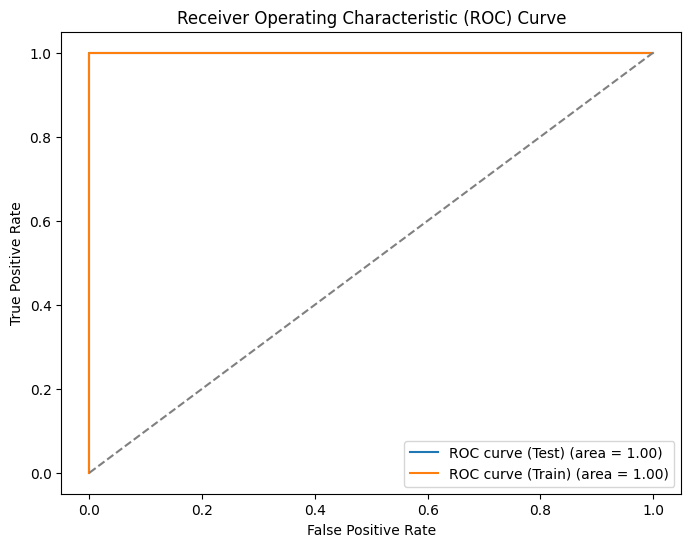

In [139]:
print(f"TEST-ACCURACY-SCORE: \n {accuracy_score(y_test, y_pred)}\n")
print(f"TRAIN-ACCURACY-SCORE: \n {accuracy_score(y_train, y_train_pred)}\n")
print(f"F1-SCORE: \n {f1_score(y_test, y_pred)}\n")
print(f"PRECISION: \n {precision_score(y_test, y_pred)}\n")
print(f"RECALL: \n {recall_score(y_test, y_pred)}\n")
print(f"ROC-AUC-SCORE: \n {roc_auc_score(y_test, y_pred_proba[:,1])}\n")
print(f"Brier Score: \n{brier_score_loss(y_test, y_pred_proba[:, 1])}\n")
print(f"CONFUSION_MATRIX: \n {confusion_matrix(y_test, y_pred)}\n")
print(F"CLASSIFICATION REPORT: \n {classification_report(y_test, y_pred)}")


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_pred_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (Test) (area = %0.2f)" % roc_auc_score(y_test, y_pred_proba[:, 1]))
plt.plot(fpr_train, tpr_train, label="ROC curve (Train) (area = %0.2f)" % roc_auc_score(y_train, y_train_pred_proba[:, 1]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


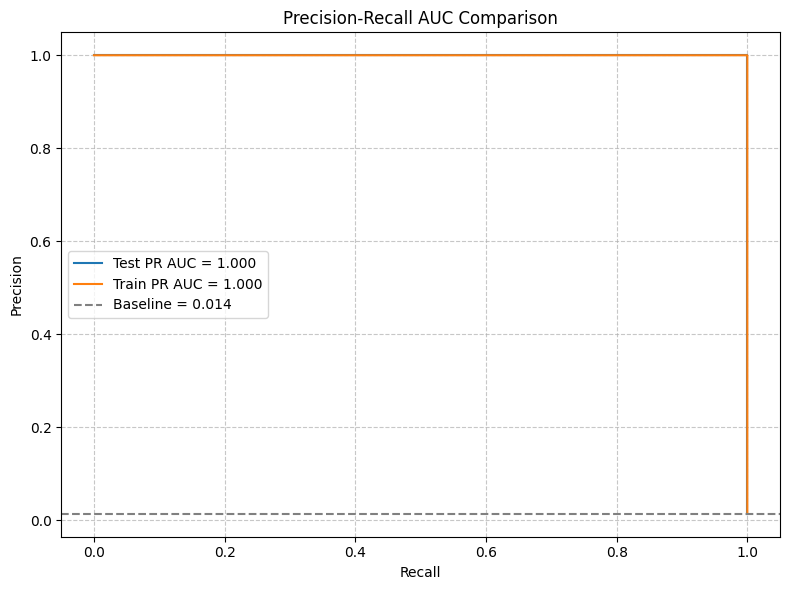

PR AUC (Test): 1.0000
PR AUC (Train): 1.0000


In [142]:
from sklearn.metrics import precision_recall_curve, auc
# Create a figure for PR AUC comparison
plt.figure(figsize=(8, 6))

# Calculate PR curve and AUC for test set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
pr_auc_test = auc(recall_test, precision_test)

# Calculate PR curve and AUC for train set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_proba[:, 1])
pr_auc_train = auc(recall_train, precision_train)

# Plot PR curves
plt.plot(recall_test, precision_test, label=f'Test PR AUC = {pr_auc_test:.3f}')
plt.plot(recall_train, precision_train, label=f'Train PR AUC = {pr_auc_train:.3f}')

# Add baseline (no skill classifier)
baseline = sum(y_test) / len(y_test)
plt.axhline(y=baseline, color='gray', linestyle='--', label=f'Baseline = {baseline:.3f}')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall AUC Comparison')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print PR AUC values
print(f"PR AUC (Test): {pr_auc_test:.4f}")
print(f"PR AUC (Train): {pr_auc_train:.4f}")



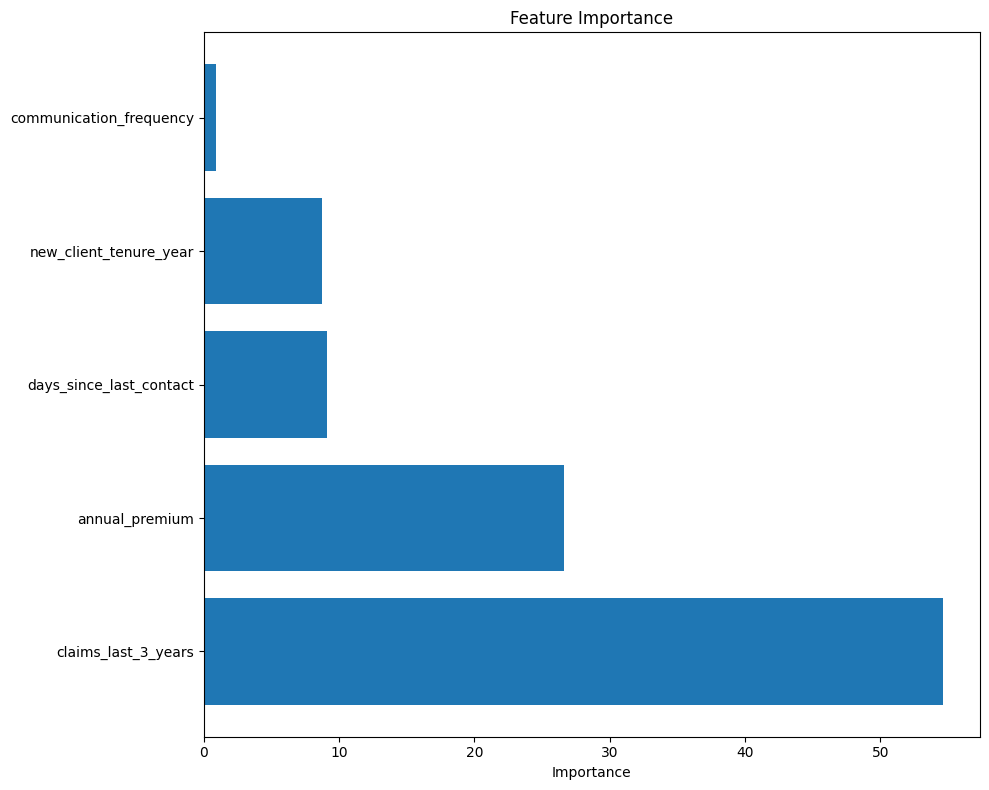

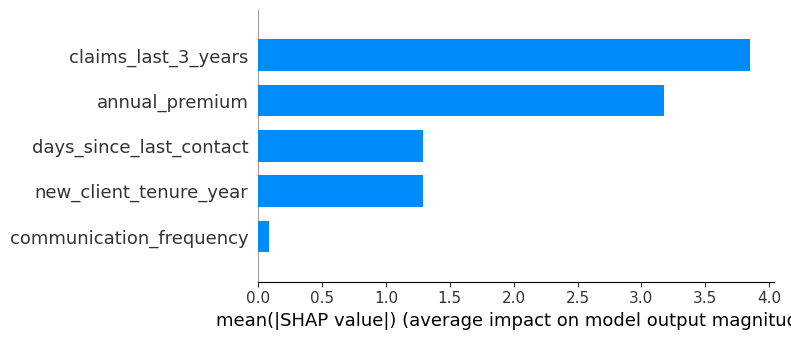

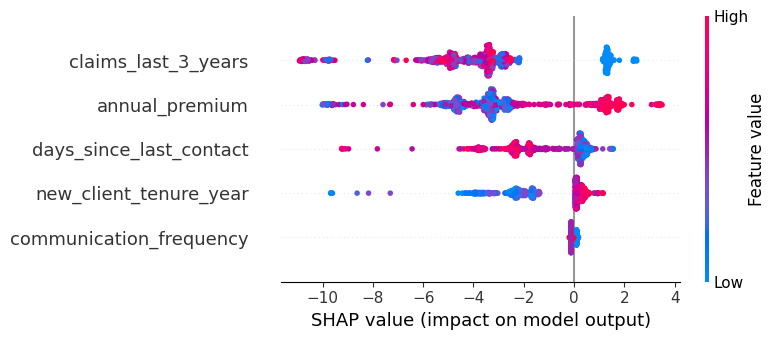

In [141]:
# Plot feature importance
plt.figure(figsize=(10, 8))
feature_importance = cat_model.get_feature_importance()
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# SHAP values for model interpretability
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed SHAP values for individual features
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test)